<a href="https://colab.research.google.com/github/ViniciusRodriguesAdm/Modelo-de-Regress-o-para-Marketing/blob/main/Modelo_de_Regress%C3%A3o_para_Marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Modelo de Regressão para marketing
import pandas as pd

In [2]:
#Baixando o arquivo para o desafio
marketing = pd.read_csv("MKT.csv")
marketing.head()

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


In [3]:
#Análise dos dados (nulos e não nulos) e o tipo de dados
marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


In [4]:
#Renomeando as colunas
marketing = marketing.rename(columns={'youtube': 'Investimento youtube', 'facebook': 'Investimento facebook', 'newspaper': 'Investimento newspaper', 'sales': 'Valor das vendas'})
marketing.head()

,Investimento youtube,Investimento facebook,Investimento newspaper,Valor das vendas
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


In [5]:
#Análise como está distribuído o dataset
marketing.describe()

,Investimento youtube,Investimento facebook,Investimento newspaper,Valor das vendas
count,171.000000,171.000000,171.000000,171.000000
mean,178.021053,27.671579,35.240000,16.922807
std,102.449597,17.913532,24.902918,6.314608
min,0.840000,0.000000,0.360000,1.920000
25%,91.080000,11.700000,13.740000,12.540000
50%,179.760000,26.760000,31.080000,15.480000
75%,262.980000,43.680000,50.880000,20.820000
max,355.680000,59.520000,121.080000,32.400000


In [6]:
#Função agregação com a média do retorno investido
agg_mkt_investimento = marketing.groupby(['Investimento youtube','Investimento facebook','Investimento newspaper'])['Valor das vendas'].agg('mean').reset_index()
agg_mkt_investimento

,Investimento youtube,Investimento facebook,Investimento newspaper,Valor das vendas
0,0.84,47.52,10.44,1.92
1,4.92,13.92,6.84,3.84
2,6.48,35.88,11.28,6.36
3,8.76,33.72,49.68,6.60
4,9.36,46.68,60.72,7.92
...,...,...,...,...
166,347.64,50.76,61.44,30.48
167,348.84,4.92,10.20,15.36
168,351.48,33.96,51.84,25.68
169,352.32,33.24,2.16,24.84


In [7]:
#Biblioteca
import matplotlib.pyplot as plt

In [8]:
#Biblioteca
%pip install plotly
%pip install cufflinks
%pip install chart-studio

import pandas as pd
import seaborn as sns
import numpy as np
import chart_studio.plotly as py
import cufflinks as cf

import plotly.graph_objects as go
import plotly.express as px

In [9]:
#Visão gráfica do describe - Investimento Youtube
fig = px.box(marketing, x="Investimento youtube")
fig.update_traces(line_color="green")

In [10]:
#Visão gráfica do describe - Investimento Facebook
fig = px.box(marketing, x="Investimento facebook")
fig.update_traces(line_color="green")

In [11]:
#Visão gráfica do describe - Investimento Newspaper
fig = px.box(marketing, x="Investimento newspaper")
fig.update_traces(line_color="green")

In [12]:
#Visão gráfica do describe - Valor das Vendas
fig = px.box(marketing, x="Valor das vendas")
fig.update_traces(line_color="green")

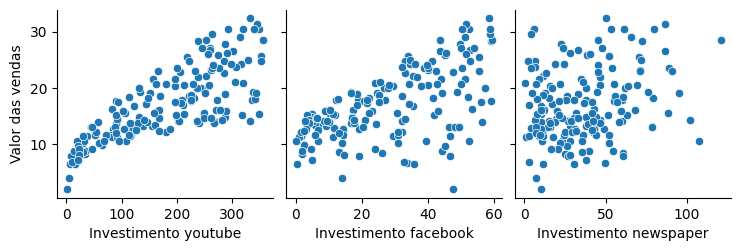

In [13]:
#Correlação de todas as colunas somente com o preço
sns.pairplot(marketing, x_vars=['Investimento youtube','Investimento facebook','Investimento newspaper'], y_vars=['Valor das vendas']);

In [14]:
#Correlação das informações na base
marketing.corr()

,Investimento youtube,Investimento facebook,Investimento newspaper,Valor das vendas
Investimento youtube,1.000000,0.086538,0.110759,0.782030
Investimento facebook,0.086538,1.000000,0.293425,0.602918
Investimento newspaper,0.110759,0.293425,1.000000,0.254987
Valor das vendas,0.782030,0.602918,0.254987,1.000000


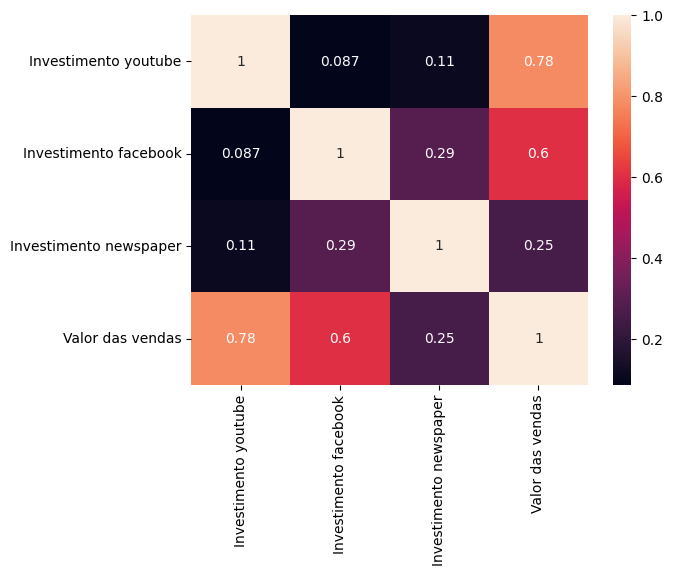

In [15]:
#Mapa de Calor
sns.heatmap(marketing.corr(), annot=True);

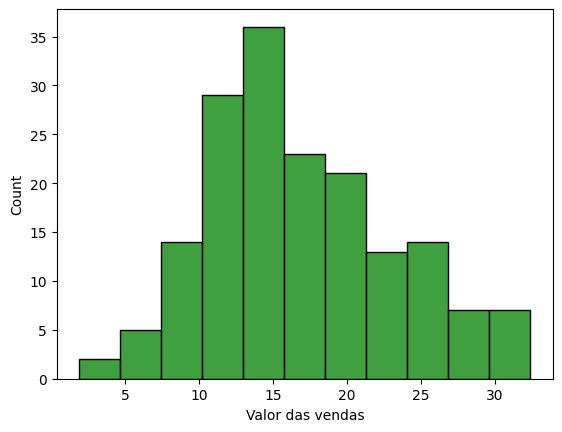

In [16]:
#Frequência das vendas
sns.histplot(marketing['Valor das vendas'], color='green');

In [17]:
#Treinando o Modelo
X = marketing[['Investimento youtube','Investimento facebook','Investimento newspaper']]
Y = marketing[['Valor das vendas']]

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.7, test_size = 0.3, random_state = 42)

In [18]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(119, 3)
(52, 3)
(119, 1)
(52, 1)


In [19]:
#Modelo de Regressão
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [20]:
lm.fit(X_train, Y_train)

LinearRegression()

In [21]:
#Predizendo Base de Teste
y_pred = lm.predict(X_test)

In [22]:
#Predição das Vendas
from sklearn.metrics import r2_score
r = r2_score(Y_test, y_pred)

In [23]:
print("r_quadrado:", r)

r_quadrado: 0.882423505618885


In [24]:
import matplotlib.pyplot as plt

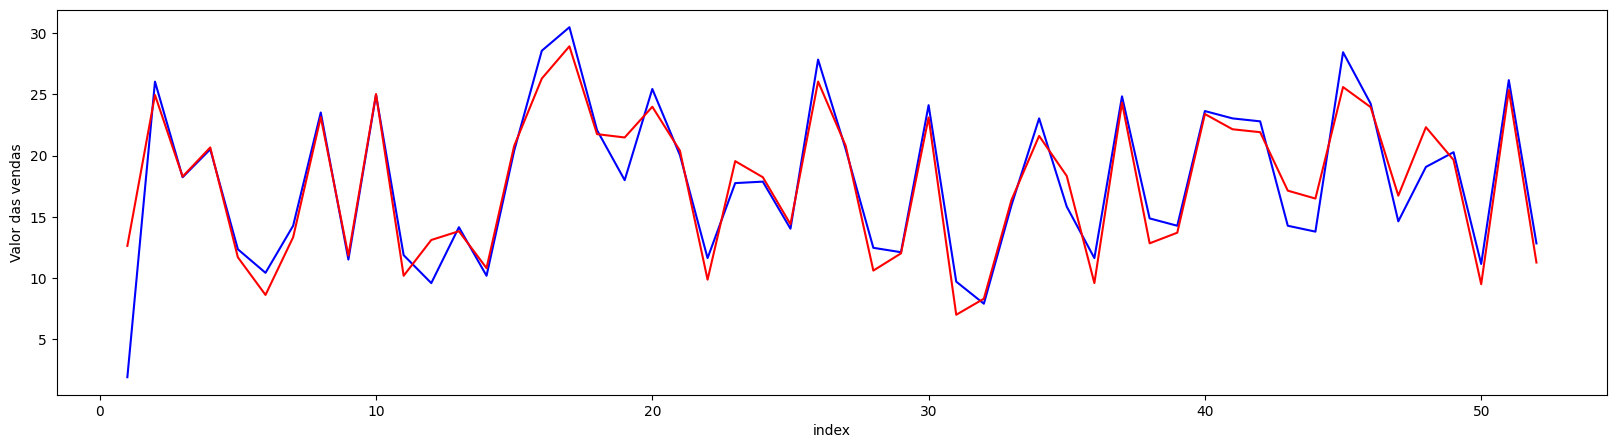

In [25]:
#Visão Gráfica
c= [i for i in range(1, 53, 1)]
fig = plt.figure(figsize=(20,5))
plt.plot(c, Y_test, color="blue")
plt.plot(c, y_pred, color="red")
plt.xlabel("index")
plt.ylabel("Valor das vendas");